In [1]:
import os
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,ConfusionMatrixDisplay,roc_curve
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
os.getcwd()

'd:\\Datascience_Projects\\ML_Payment_default_predictions\\Notebook'

In [5]:
file_dir=r"D:\Datascience_Projects\ML_Credit_card_default_predictions\Data\raw_data"
file_name=r"UCI_Credit_Card.csv"

In [6]:
import pandas as pd
pd.set_option('display.max_columns',25)

In [7]:
file_path = os.path.join(file_dir,file_name)
file_path

'D:\\Datascience_Projects\\ML_Credit_card_default_predictions\\Data\\raw_data\\UCI_Credit_Card.csv'

In [8]:
cred_df= pd.read_csv(file_path)
cred_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [10]:
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [11]:
cred_df.shape

(30000, 25)

In [12]:
cred_df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

## There are no missing values in the columns

From Data Description we find that the SEX,EDUCATION and MARRIAGE are categorical variables with values 
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE:Marital status (1=married, 2=single, 3=others)
### Checking if the values entered are valid (Data Validation)

In [13]:
for col in ['SEX','EDUCATION','MARRIAGE']:
    print(cred_df[col].value_counts(sort=False))
    print("\n")

1    11888
2    18112
Name: SEX, dtype: int64


0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64


0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64




In [14]:
cred_df=cred_df.rename(columns={'default.payment.next.month':'default'})
cred_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

0    77.88
1    22.12
Name: default, dtype: float64


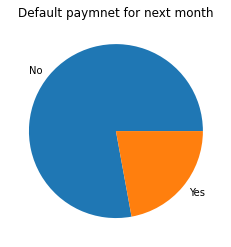

In [16]:
print(cred_df.default.value_counts()/cred_df.default.value_counts().sum()*100)
plt.title("Default paymnet for next month")
plt.pie(cred_df.default.value_counts(),labels=['No','Yes'])
plt.show()

78 % of people in the dataset do not default while 22% of the people default the paymnet

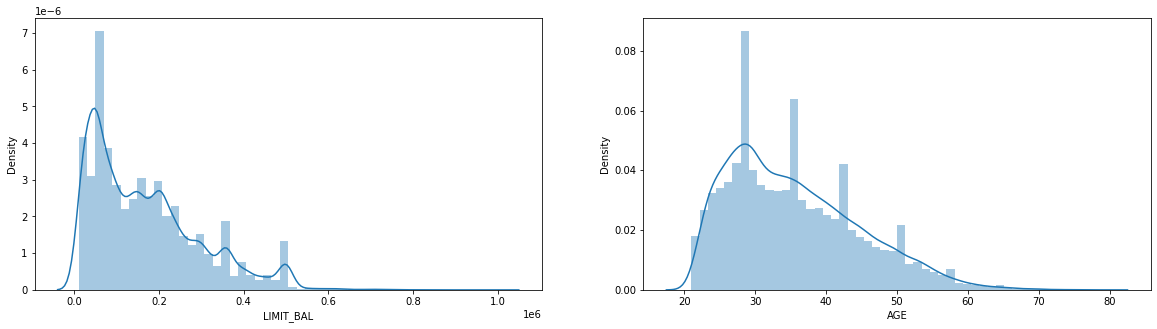

In [17]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(cred_df.LIMIT_BAL)

plt.subplot(122)
sns.distplot(cred_df.AGE)

plt.show()

By plotting the distributions we observe that dataset consists of skewed data of limiting balance and age of clients.
We have more number of clients having limiting balance between 0 to 200000 currency.
We have more number of clients from age bracket of 20 to 40, i.e., clients from mostly young to mid aged groups.

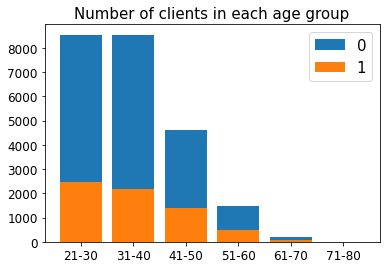

In [15]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
cred_df['AGE_BIN'] = pd.cut(x=cred_df.AGE, bins=bins, labels=names, right=True)

age_cnt = cred_df.AGE_BIN.value_counts()
age_0 = (cred_df.AGE_BIN[cred_df['default'] == 0].value_counts())
age_1 = (cred_df.AGE_BIN[cred_df['default'] == 1].value_counts())

plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')

#for x,y in zip(names,age_0):
 #   plt.text(x,y,y,fontsize=12)
#for x,y in zip(names,age_1):
 #   plt.text(x,y,y,fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

We have maximum clients from 21-30 age group followed by 31-40. Hence with increasing age group the number of clients that will default the payment next month is decreasing. Hence we can see that Age is important feature to predict the default payment for next month.

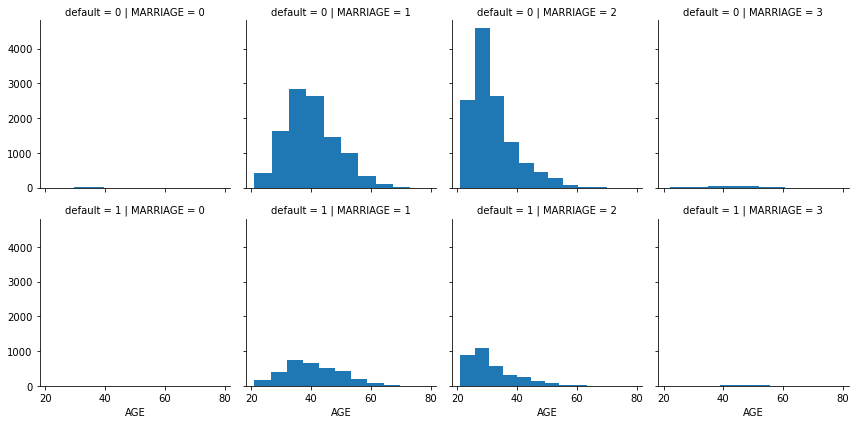

In [16]:
g = sns.FacetGrid(cred_df, row='default', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

From above plot we can infer that married people between age bracket of 30 and 50 and unmarried clients of age 20-30 tend to default payment with unmarried clients higher probability to default payment. Hence we can include MARRIAGE feature of clients to find probability of defaulting the payment next month

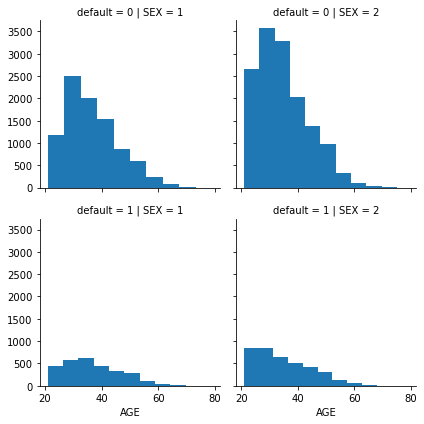

In [17]:
g = sns.FacetGrid(cred_df, row='default', col='SEX')
g = g.map(plt.hist, 'AGE')

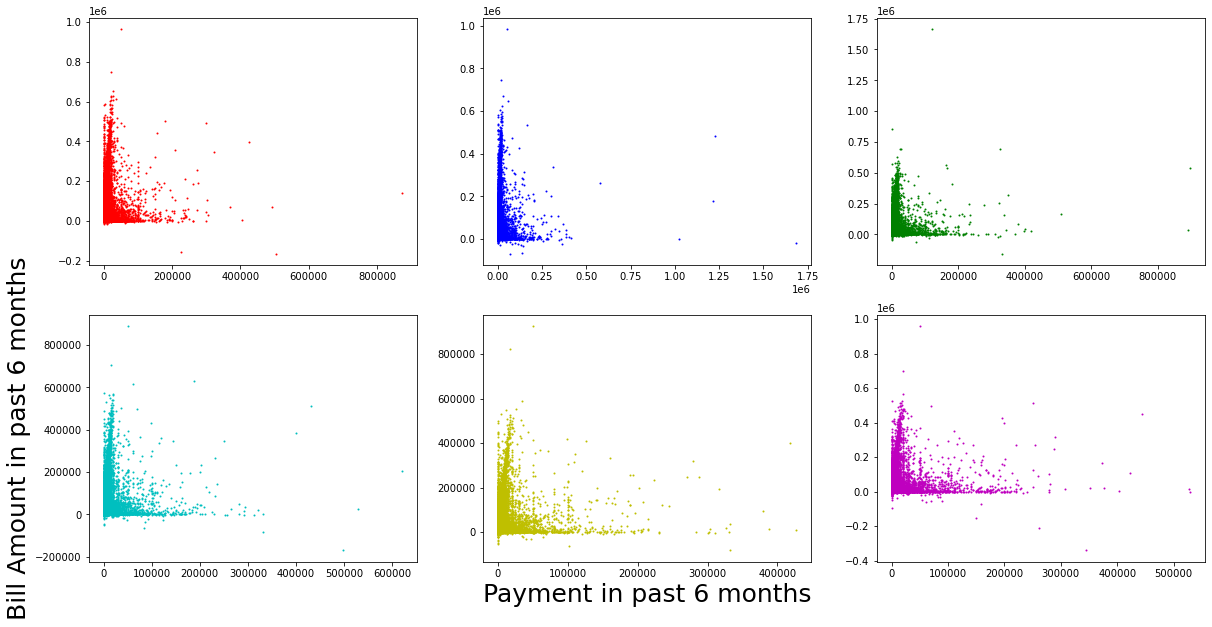

In [20]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=cred_df.PAY_AMT1, y=cred_df.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=cred_df.PAY_AMT2, y=cred_df.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=cred_df.PAY_AMT3, y=cred_df.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=cred_df.PAY_AMT4, y=cred_df.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=cred_df.PAY_AMT5, y=cred_df.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months",fontsize=25)

plt.subplot(236)
plt.scatter(x=cred_df.PAY_AMT6, y=cred_df.BILL_AMT6, c='m', s=1)

plt.show()

Above plot indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low. This we can infer since maximum number of datapoints are closely packed along the Y-axis near to 0 on X-axis

<AxesSubplot:>

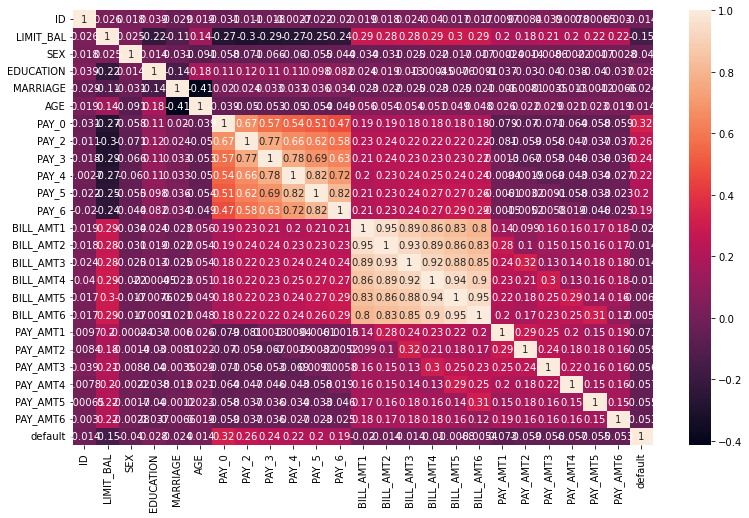

In [14]:
plt.figure(figsize=(13,8))
sns.heatmap(cred_df.corr(), annot=True )

We can drop column ID as it does not play any role in determining credit default

From the correlation heatmap above, it can be seen that there are some relationships between the feature columns, they are not entirely independent. 

But in this scenario, there is a correlation because a customer who was not able to pay the bill for 1 month was again not able to pay it for the subsequent months and hence the correlation.

Again for the bill amount column, the same has happened. If the customer was not able to pay the bill, then the bill amount almost remained the same, or if the customer was able to pay then the bill amount got reduced.

We remove columns when they convey the same information. But here, dropping the columns shall result in the loss of bill and payment history data. So, we don’t need to drop any column although there is a correlation. 

In [18]:
data=cred_df.drop(labels=['ID'],axis=1)

In [19]:
x=data.drop(labels=['default'],axis=1)
y=data['default']

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
strat_train_set = None
strat_test_set = None

In [21]:
#splitting data through train_indedx and test_index
for train_index,test_index in split.split(data, data['default']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [22]:
x_train=strat_train_set.drop(labels=['default'],axis=1)
y_train=strat_train_set['default']
x_test=strat_test_set.drop(labels=['default'],axis=1)
y_test=strat_test_set['default']

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [24]:
scaled_train_data=scaler.fit_transform(x_train)
scaled_test_data=scaler.transform(x_test)

In [25]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(scaled_train_data,y_train)

LogisticRegression()

In [26]:
y_pred_reg=log_reg.predict(scaled_train_data)
accuracy_score(y_pred=y_pred_reg,y_true=y_train)

0.8115

In [27]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier()
RF.fit(scaled_train_data,y_train)

RandomForestClassifier()

In [28]:
y_pred=RF.predict(scaled_train_data)

In [29]:

accuracy_score(y_pred=y_pred,y_true=y_train)

0.999375

>>>>>>>>>>>>>>>>>>>>>>>>>>For Training dataset<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Confusion Matrix
------------------------------------------------------------------------------------


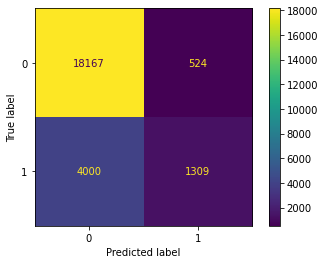

------------------------------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     18691
           1       0.71      0.25      0.37      5309

    accuracy                           0.81     24000
   macro avg       0.77      0.61      0.63     24000
weighted avg       0.80      0.81      0.77     24000

------------------------------------------------------------------------------------


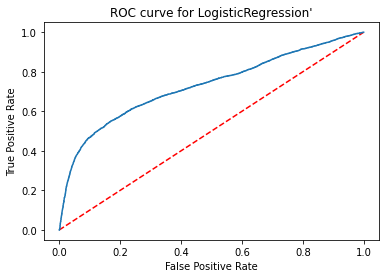

In [30]:
#Confusion Matrix
print(">>>>>>>>>>>>>>>>>>>>>>>>>>For Training dataset<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
print("Confusion Matrix")
print("------------------------------------------------------------------------------------")
cm=confusion_matrix(y_true=y_train,y_pred=y_pred_reg,labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)
disp.plot()
plt.show()
print("------------------------------------------------------------------------------------")
#Classification report
print("Classification report")
print(classification_report(y_true=y_train,y_pred=y_pred_reg))
print("------------------------------------------------------------------------------------")
y_pred_prob_train = log_reg.predict_proba(scaled_train_data)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr,tpr,thresholds=roc_curve(y_true=y_train,y_score=y_pred_prob_train)
# Plot ROC curve
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for "+str(log_reg.__class__).split(".")[-1].split(">")[0])
plt.show()

In [31]:
y_pred_test_reg=log_reg.predict(scaled_test_data)
accuracy_score(y_pred=y_pred_test_reg,y_true=y_test)

0.8078333333333333

>>>>>>>>>>>>>>>>>>>>>>>>>>For testing dataset<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Confusion Matrix
------------------------------------------------------------------------------------


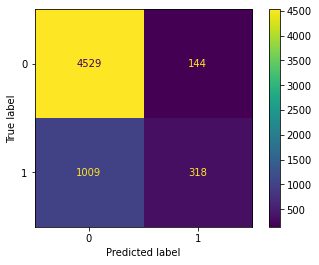

------------------------------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

------------------------------------------------------------------------------------


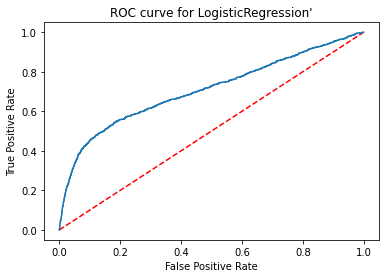

In [32]:
#Confusion Matrix
print(">>>>>>>>>>>>>>>>>>>>>>>>>>For testing dataset<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
print("Confusion Matrix")
print("------------------------------------------------------------------------------------")
cm=confusion_matrix(y_true=y_test,y_pred=y_pred_test_reg,labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)
disp.plot()
plt.show()
print("------------------------------------------------------------------------------------")
#Classification report
print("Classification report")
print(classification_report(y_true=y_test,y_pred=y_pred_test_reg))
print("------------------------------------------------------------------------------------")
y_pred_prob_test = log_reg.predict_proba(scaled_test_data)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr,tpr,thresholds=roc_curve(y_true=y_test,y_score=y_pred_prob_test)
# Plot ROC curve
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for "+str(log_reg.__class__).split(".")[-1].split(">")[0])
plt.show()

>>>>>>>>>>>>>>>>>>>>>>>>>>For Training dataset<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Confusion Matrix
------------------------------------------------------------------------------------


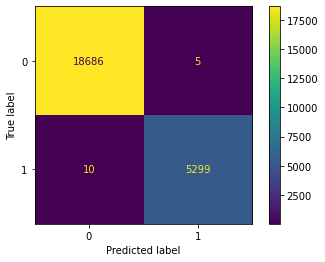

------------------------------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18691
           1       1.00      1.00      1.00      5309

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000

------------------------------------------------------------------------------------


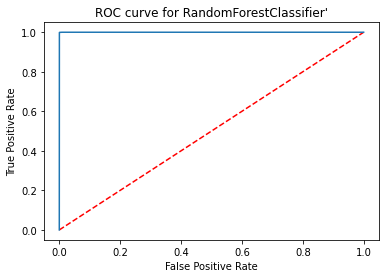

In [33]:
#Confusion Matrix
print(">>>>>>>>>>>>>>>>>>>>>>>>>>For Training dataset<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
print("Confusion Matrix")
print("------------------------------------------------------------------------------------")
cm=confusion_matrix(y_true=y_train,y_pred=y_pred,labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RF.classes_)
disp.plot()
plt.show()
print("------------------------------------------------------------------------------------")
#Classification report
print("Classification report")
print(classification_report(y_true=y_train,y_pred=y_pred))
print("------------------------------------------------------------------------------------")
y_pred_prob_train_RF = RF.predict_proba(scaled_train_data)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr,tpr,thresholds=roc_curve(y_true=y_train,y_score=y_pred_prob_train_RF)
# Plot ROC curve
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for "+str(RF.__class__).split(".")[-1].split(">")[0])
plt.show()

In [34]:
y_pred_test_RF=RF.predict(scaled_test_data)
accuracy_score(y_pred=y_pred_test_RF,y_true=y_test)

0.8135

>>>>>>>>>>>>>>>>>>>>>>>>>>For testing dataset<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Confusion Matrix
------------------------------------------------------------------------------------


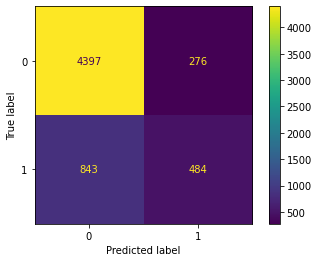

------------------------------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.64      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.79      0.81      0.79      6000

------------------------------------------------------------------------------------


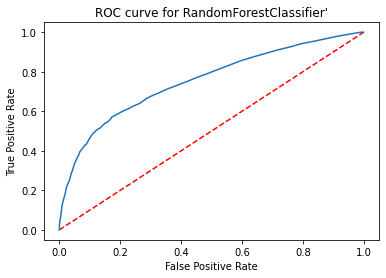

In [35]:
#Confusion Matrix
print(">>>>>>>>>>>>>>>>>>>>>>>>>>For testing dataset<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
print("Confusion Matrix")
print("------------------------------------------------------------------------------------")
cm=confusion_matrix(y_true=y_test,y_pred=y_pred_test_RF,labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RF.classes_)
disp.plot()
plt.show()
print("------------------------------------------------------------------------------------")
#Classification report
print("Classification report")
print(classification_report(y_true=y_test,y_pred=y_pred_test_RF))
print("------------------------------------------------------------------------------------")
y_pred_prob_test_RF = RF.predict_proba(scaled_test_data)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr,tpr,thresholds=roc_curve(y_true=y_test,y_score=y_pred_prob_test_RF)
# Plot ROC curve
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for "+str(RF.__class__).split(".")[-1].split(">")[0])
plt.show()

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
param_grid={
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [37]:
grid_search=GridSearchCV(estimator=RF,param_grid=param_grid,scoring="recall",cv=5,verbose=3)

In [38]:
grid_search.fit(scaled_train_data,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.331 total time=   9.5s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.343 total time=   9.4s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.351 total time=   8.9s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.372 total time=   9.4s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.328 total time=   8.7s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.355 total time=  17.2s
[CV 2/5] END bootstrap=True, max_dep

KeyboardInterrupt: 